In [9]:
import pandas as pd
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
data=pd.read_csv('/content/drive/My Drive/NATOPS_sid_TRAIN.csv')
data_head = data.head()
data_head

,isTest,fea1,fea2,fea3,fea4,fea5,fea6,fea7,fea8,fea9,...,fea17,fea18,fea19,fea20,fea21,fea22,fea23,fea24,sid,class
0,0,-0.372758,-1.821679,-0.846321,0.465208,-2.015072,-0.839242,-0.564097,-0.796225,-0.149604,...,-1.534954,-0.673190,-0.536343,-1.626957,-0.594337,0.619205,-1.771773,-0.810086,1,3
1,0,-0.367844,-1.841987,-0.846325,0.467033,-2.007557,-0.838151,-0.564499,-0.797622,-0.150012,...,-1.532795,-0.671919,-0.533816,-1.642514,-0.605328,0.617045,-1.796660,-0.818863,1,3
2,0,-0.378445,-1.821358,-0.839571,0.471135,-2.010042,-0.832021,-0.563753,-0.795704,-0.151608,...,-1.532478,-0.671555,-0.526319,-1.697145,-0.624302,0.624789,-1.738568,-0.788060,1,3
3,0,-0.386751,-1.845643,-0.848031,0.506153,-2.032552,-0.841696,-0.565008,-0.790238,-0.152350,...,-1.535441,-0.672198,-0.554538,-1.644413,-0.602884,0.634100,-1.749744,-0.816695,1,3
4,0,-0.417101,-1.941721,-0.885500,0.611207,-1.953282,-0.902529,-0.573550,-0.799730,-0.169575,...,-1.482552,-0.659393,-0.576196,-1.763092,-0.694843,0.680086,-1.664565,-0.857897,1,3


  0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

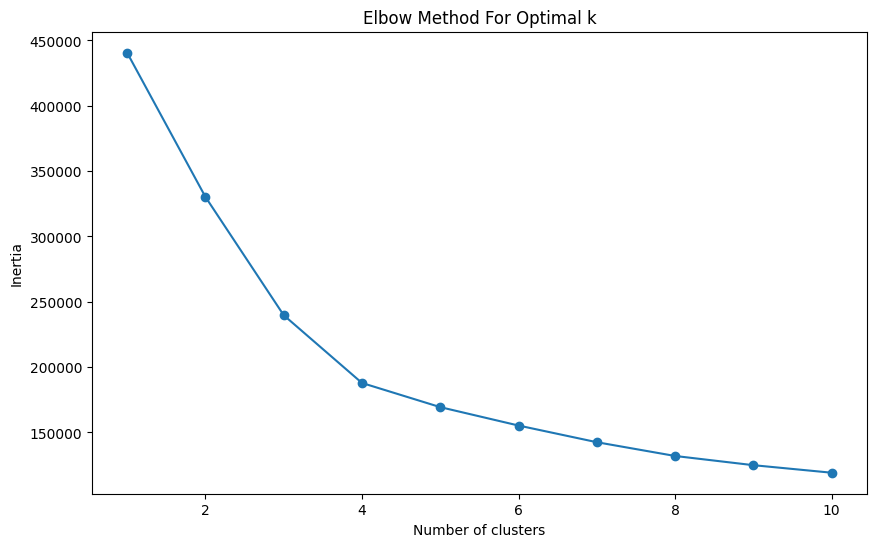

In [12]:
# Standardizing the features
features = data.drop(['isTest', 'sid', 'class'], axis=1)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Use the elbow method to find the optimal number of clusters
inertia = []
for i in tqdm(range(1, 11)):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [13]:
# Based on the elbow plot we choose an optimal number of clusters
# this is usually where the inertia begins to decrease more slowly
# in this case optimal number of clusters = 3

kmeans = KMeans(n_clusters=3, random_state=0)
data['cluster'] = kmeans.fit_predict(features_scaled)

# calculating the ratio of each cluster for each sample (sid)
cluster_ratios = data.groupby('sid')['cluster'].value_counts(normalize=True).unstack(fill_value=0)

cluster_ratios.reset_index(inplace=True)

# Merge the cluster ratios with the original data to get the test/train and class columns
final_data = cluster_ratios.merge(data[['sid', 'isTest', 'class']].drop_duplicates(), on='sid')

final_data = final_data[['isTest', 'sid', 'class', 0, 1, 2]]

# Rename the cluster ratio columns
final_data.columns = ['isTest', 'sid', 'class', 'cluster_0_ratio', 'cluster_1_ratio', 'cluster_2_ratio']

final_data.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,isTest,sid,class,cluster_0_ratio,cluster_1_ratio,cluster_2_ratio
0,0,1,3,0.431373,0.274510,0.294118
1,0,2,2,0.666667,0.333333,0.000000
2,0,3,2,0.705882,0.294118,0.000000
3,0,4,3,0.411765,0.333333,0.254902
4,0,5,2,0.647059,0.352941,0.000000


In [14]:
cluster_ratios

cluster,sid,0,1,2
0,1,0.431373,0.274510,0.294118
1,2,0.666667,0.333333,0.000000
2,3,0.705882,0.294118,0.000000
3,4,0.411765,0.333333,0.254902
4,5,0.647059,0.352941,0.000000
...,...,...,...,...
355,356,0.529412,0.117647,0.352941
356,357,0.568627,0.431373,0.000000
357,358,0.470588,0.254902,0.274510
358,359,0.490196,0.274510,0.235294


In [15]:
final_data

,isTest,sid,class,cluster_0_ratio,cluster_1_ratio,cluster_2_ratio
0,0,1,3,0.431373,0.274510,0.294118
1,0,2,2,0.666667,0.333333,0.000000
2,0,3,2,0.705882,0.294118,0.000000
3,0,4,3,0.411765,0.333333,0.254902
4,0,5,2,0.647059,0.352941,0.000000
...,...,...,...,...,...,...
355,1,356,5,0.529412,0.117647,0.352941
356,1,357,2,0.568627,0.431373,0.000000
357,1,358,4,0.470588,0.254902,0.274510
358,1,359,3,0.490196,0.274510,0.235294


In [16]:
output_csv = "clustered_data.csv"
final_data.to_csv(output_csv, index=True)